In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
! pip install pydub
from pydub import AudioSegment
import IPython

trainpath = 'C:/Users/fatim/Downloads/data/train/'
for dirname, _, filenames in os.walk(trainpath):
    for filename in filenames:
        print(dirname + filename)

C:/Users/fatim/Downloads/data/train/0mbsexwoja8u4n12v5ql.wav
C:/Users/fatim/Downloads/data/train/0p5dwnmxgabovt8u4hrf.wav
C:/Users/fatim/Downloads/data/train/0tjkrsnv1lfcub7hp5ex2.wav
C:/Users/fatim/Downloads/data/train/0y4whrmeixdalkz8s6bju.wav
C:/Users/fatim/Downloads/data/train/1t6w3k05q7j8clfmy9ug.wav
C:/Users/fatim/Downloads/data/train/2glnftjbpehdy7xi953a.wav
C:/Users/fatim/Downloads/data/train/2jgkywshetpr43xdabn7.wav
C:/Users/fatim/Downloads/data/train/32bixqwuv5anmtgzl8cj.wav
C:/Users/fatim/Downloads/data/train/3kp695hfniwozetu0aqrg.wav
C:/Users/fatim/Downloads/data/train/3xpvqgtyd9ucwmk6bof4.wav
C:/Users/fatim/Downloads/data/train/3zebh15sl6djpx4ri7g0u.wav
C:/Users/fatim/Downloads/data/train/41g2s8z3i7dkhfwtyoul0.wav
C:/Users/fatim/Downloads/data/train/43kjhxb2d9qpmatrv51e.wav
C:/Users/fatim/Downloads/data/train/46khm1wtnip8zeb7doj0.wav
C:/Users/fatim/Downloads/data/train/4eh591vt6x2surm08l3o.wav
C:/Users/fatim/Downloads/data/train/4nt1978i5lmdk36pz2yxh.wav
C:/Users/fatim/Dow

In [2]:
import librosa
import pandas as pd
import os


metadata=pd.read_csv('train (1).csv')
metadata.head()

,id,label
0,gudj6np7lx4ov5a9y3wq,1
1,mi2z51y4jb7thxuf8ldr,1
2,ziuab84tvf07snxjhyodp,0
3,ulcdyxnbz6jqh9wmk4pa,1
4,gj8rfxzae4vibtohk62n1,0


In [3]:
metadata_test=pd.read_csv('test (1).csv')

In [8]:
x , sr = librosa.load(trainpath  + 'k1xcfnu6vwm3p8y5lior2.wav')

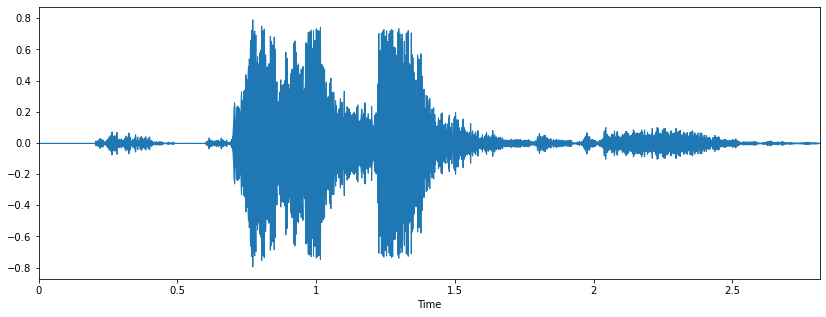

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

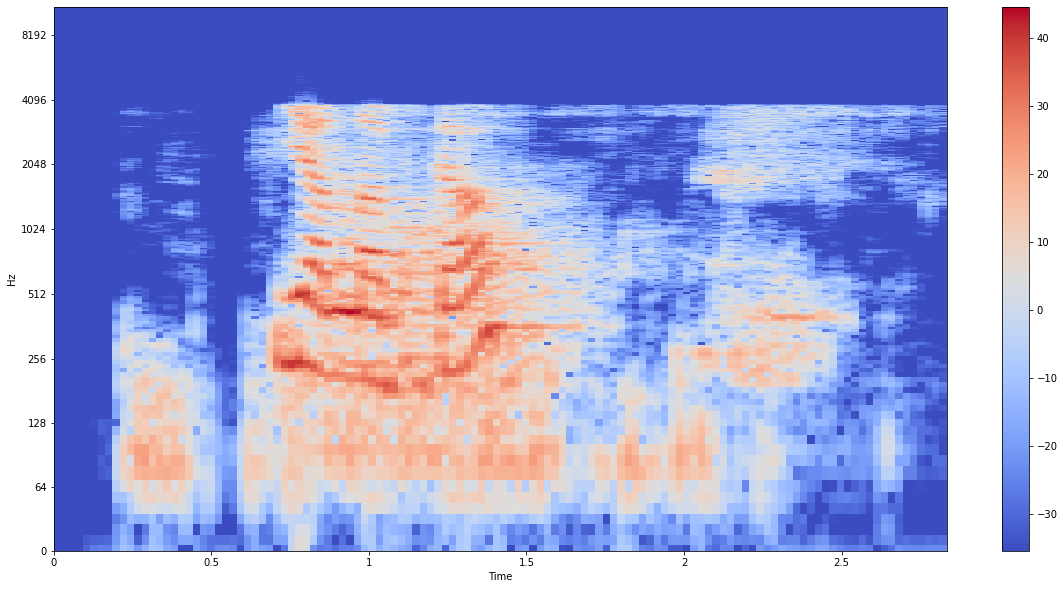

In [10]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 10))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

(20, 122)


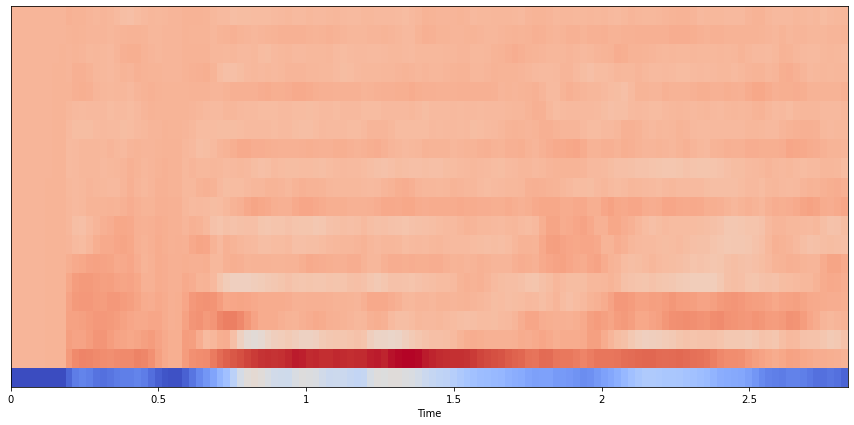

In [11]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [12]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return mfccs_processed

In [13]:
features = []
# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = trainpath + row["id"]+".wav"
    class_label = row["label"]
    data = extract_features(file_name)
    
    features.append([row["id"],data, class_label])
# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=["id",'feature','class_label'])

In [15]:
features = []
testpath="C:/Users/fatim/Downloads/data/test/"
# Iterate through each sound file and extract the features 
for index,row in metadata_test.iterrows():
    file_name = testpath + row["id"]+ ".wav"
    data = extract_features(file_name)
    features.append([row["id"],data])
# Convert into a Panda dataframe 
featuresdf_test = pd.DataFrame(features, columns=["id",'feature'])

In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())
# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(y)

In [18]:
X_test=np.array(featuresdf_test.feature.tolist())

In [19]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Activation, Dense,Dropout

In [20]:
num_labels = yy.shape[1]
filter_size = 2
def build_model_graph(input_shape=(40,)):
    model = Sequential()
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    # Compile the model
    model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer='adam')
    return model
model = build_model_graph()

In [21]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 
num_epochs = 100
num_batch_size = 32
model.fit(X, y, batch_size=num_batch_size, epochs=num_epochs, verbose=1)

Epoch 1/100


C:\Users\fatim\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 1s 10ms/step - loss: 23.4650 - accuracy: 0.5347
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 27.5437 - accuracy: 0.4583
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 19.5780 - accuracy: 0.5069
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 20.3093 - accuracy: 0.5347
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 18.4393 - accuracy: 0.5556
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 12.8458 - accuracy: 0.5764
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 15.2386 - accuracy: 0.5000
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 12.9432 - accuracy: 0.5278
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 10.6424 - accuracy: 0.5972
Epoch 10/100
5/5 [==============================] - ETA: 0s - loss: 13.2670 - accuracy: 0.375 - 0s 4ms/step - loss: 9.7922 - accu

5/5 [==============================] - 0s 6ms/step - loss: 0.6573 - accuracy: 0.6389
Epoch 84/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7521 - accuracy: 0.6319
Epoch 85/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6632 - accuracy: 0.6389
Epoch 86/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7853 - accuracy: 0.5764
Epoch 87/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6605 - accuracy: 0.6667
Epoch 88/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.6319
Epoch 89/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6498 - accuracy: 0.6458
Epoch 90/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8290 - accuracy: 0.6250
Epoch 91/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7243 - accuracy: 0.5972
Epoch 92/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8056 - accuracy: 0.5764
Epoch 93/100
5/5 [===============

In [22]:
prediction = model.predict(X_test)

In [23]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [24]:
predictions = probability_model.predict(X_test)

In [25]:
pred=[np.argmax(predictions[i]) for i in range(len(predictions))]

In [26]:
metadata_test["label"]=pred

In [27]:
metadata_test.to_csv("sub2.csv",index=False)